In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import random
from tqdm.notebook import tqdm
from PIL import Image
from skimage.transform import resize
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers, Model
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization 
from keras.layers import Activation, Conv2DTranspose, concatenate, Input, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras import backend as K

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xzvf "/content/drive/MyDrive/Diss_Dataset.tar.gz" 

In [ ]:
#Confirm the size of each split

dirr = "/content/Diss_Dataset/"

print('Total input train images: ', len(os.listdir(dirr+"input/train")))
print('Total input validation images: ', len(os.listdir(dirr+"input/validation")))
print('Total input test images: ', len(os.listdir(dirr+"input/test")))
print('Total target train images: ', len(os.listdir(dirr+"target/train")))
print('Total target validation images: ', len(os.listdir(dirr+"target/validation")))
print('Total target test images: ', len(os.listdir(dirr+"target/test")))

Total input train images:  4100
Total input validation images:  400
Total input test images:  400
Total target train images:  4100
Total target validation images:  400
Total target test images:  400


In [ ]:
#Load the inputs and targets into arrays

im_width = 256
im_height = 256

train_ids = next(os.walk(dirr+"input/train"))[2]
tar_ids = next(os.walk(dirr+"target/train"))[2]

train_ids = sorted(train_ids)
tar_ids = sorted(tar_ids)

In [ ]:
for i in range(0,10):
  print(train_ids[i])
  print(tar_ids[i])

0one_ell_app_res.tiff
0one_ell_true.tiff
0one_rec_app_res.tiff
0one_rec_true.tiff
0three_ell_app_res.tiff
0three_ell_true.tiff
0three_rec_app_res.tiff
0three_rec_true.tiff
0two_ell_app_res.tiff
0two_ell_true.tiff
0two_obj_app_res.tiff
0two_obj_true.tiff
0two_rec_app_res.tiff
0two_rec_true.tiff
1000one_ell_app_res.tiff
1000one_ell_true.tiff
1001one_ell_app_res.tiff
1001one_ell_true.tiff
1002one_ell_app_res.tiff
1002one_ell_true.tiff


In [ ]:
X = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.float32)
y = np.zeros((len(tar_ids), im_height, im_width, 1), dtype=np.float32)

print(X.shape)
print(y.shape)

(4100, 256, 256, 1)
(4100, 256, 256, 1)


In [ ]:
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    #Load images
    img = load_img(dirr + "input/train/" + id_)
    x_img = img_to_array(img)[:,:,1]
    x_img = resize(x_img, (256, 256, 1), mode='constant', preserve_range=True)
    
    #Normalise images
    X[n] = x_img/255.0
    
for n, id_ in tqdm(enumerate(tar_ids), total=len(tar_ids)):
    #Load targets
    mask = load_img(dirr + "target/train/" + id_)
    mask = img_to_array(mask)[:,:,1]
    mask = resize(mask, (256, 256, 1), mode='constant', preserve_range=True)
    
    #Normalise images
    y[n] = mask/255.0

  0%|          | 0/4100 [00:00<?, ?it/s]

  0%|          | 0/4100 [00:00<?, ?it/s]

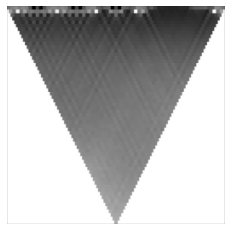

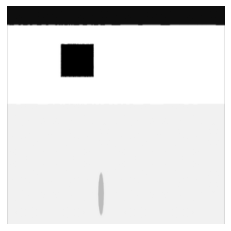

In [ ]:
#Check if training data looks okay

ix = 1000
plt.imshow(np.dstack((X[ix], X[ix], X[ix])))
plt.axis('off')
plt.show()

tmp = np.squeeze(y[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp, tmp, tmp)))
plt.axis('off')
plt.show()

In [ ]:
print(train_ids[0])
print(train_ids[10])
print(train_ids[100])
print(train_ids[1000])
print(train_ids[3000])

0one_ell_app_res.tiff
1003one_ell_app_res.tiff
1058one_ell_app_res.tiff
177two_obj_app_res.tiff
456two_obj_app_res.tiff


In [ ]:
print(tar_ids[0])
print(tar_ids[10])
print(tar_ids[100])
print(tar_ids[1000])
print(tar_ids[3000])

0one_ell_true.tiff
1003one_ell_true.tiff
1058one_ell_true.tiff
177two_obj_true.tiff
456two_obj_true.tiff


In [ ]:
print(X[1000].shape)
print(y[1000].shape)

(256, 256, 1)
(256, 256, 1)


In [ ]:
X[1000]

array([[[0.3688631 ],
        [0.41143283],
        [0.41147524],
        ...,
        [0.4078341 ],
        [0.40779185],
        [0.36559883]],

       [[0.39724743],
        [0.44309297],
        [0.44313863],
        ...,
        [0.4392173 ],
        [0.43917182],
        [0.39373195]],

       [[0.39724743],
        [0.44309297],
        [0.44313863],
        ...,
        [0.4392173 ],
        [0.43917182],
        [0.39373195]],

       ...,

       [[0.89644337],
        [0.99990004],
        [1.        ],
        ...,
        [1.        ],
        [0.9999001 ],
        [0.89644337]],

       [[0.89644337],
        [0.99990004],
        [1.        ],
        ...,
        [1.        ],
        [0.9999001 ],
        [0.89644337]],

       [[0.8323902 ],
        [0.92845464],
        [0.9285474 ],
        ...,
        [0.9285474 ],
        [0.92845464],
        [0.8323902 ]]], dtype=float32)

In [ ]:
y[1000]

array([[[0.04921649],
        [0.05489648],
        [0.05490196],
        ...,
        [0.05490196],
        [0.05489648],
        [0.04921649]],

       [[0.04921649],
        [0.05489648],
        [0.05490196],
        ...,
        [0.05490196],
        [0.05489648],
        [0.04921649]],

       [[0.04921649],
        [0.05489648],
        [0.05490196],
        ...,
        [0.05490196],
        [0.05489648],
        [0.04921649]],

       ...,

       [[0.84722686],
        [0.9450037 ],
        [0.94509804],
        ...,
        [0.94509804],
        [0.9450037 ],
        [0.84722686]],

       [[0.84722686],
        [0.9450037 ],
        [0.94509804],
        ...,
        [0.94509804],
        [0.9450037 ],
        [0.84722686]],

       [[0.84722686],
        [0.9450037 ],
        [0.94509804],
        ...,
        [0.94509804],
        [0.9450037 ],
        [0.84722686]]], dtype=float32)

In [ ]:
#Find number of channels
if X[0].ndim == 2:
    channels = 1
    print("Image has 1 channel")
else:
    channels = X[0].shape[-1]
    print("Image has ", channels, "channels")

Image has  1 channels


In [ ]:
(X[3000]==1).sum()

29786

In [ ]:
#Get validation data

val_train_ids = next(os.walk(dirr+"input/validation/"))[2]
val_tar_ids = next(os.walk(dirr+"target/validation/"))[2]

val_train_ids = sorted(val_train_ids)
val_tar_ids = sorted(val_tar_ids)

In [ ]:
for i in range(0,10):
  print(val_train_ids[i])
  print(val_tar_ids[i])

1400one_ell_app_res.tiff
1400one_ell_true.tiff
1401one_ell_app_res.tiff
1401one_ell_true.tiff
1402one_ell_app_res.tiff
1402one_ell_true.tiff
1403one_ell_app_res.tiff
1403one_ell_true.tiff
1404one_ell_app_res.tiff
1404one_ell_true.tiff
1405one_ell_app_res.tiff
1405one_ell_true.tiff
1406one_ell_app_res.tiff
1406one_ell_true.tiff
1407one_ell_app_res.tiff
1407one_ell_true.tiff
1408one_ell_app_res.tiff
1408one_ell_true.tiff
1409one_ell_app_res.tiff
1409one_ell_true.tiff


In [ ]:
X_val = np.zeros((len(val_train_ids), im_height, im_width, 1), dtype=np.float32)
y_val = np.zeros((len(val_tar_ids), im_height, im_width, 1), dtype=np.float32)

In [ ]:
for n, id_ in tqdm(enumerate(val_train_ids), total=len(val_train_ids)):
    #Load images
    img = load_img(dirr + "input/validation/" + id_)
    x_img = img_to_array(img)[:,:,1]
    x_img = resize(x_img, (256, 256, 1), mode='constant', preserve_range=True)
    
    #Normalise images
    X_val[n] = x_img/255.0
    
for n, id_ in tqdm(enumerate(val_tar_ids), total=len(val_tar_ids)):
    #Load targets
    mask = load_img(dirr + "target/validation/" + id_)
    mask = img_to_array(mask)[:,:,1]
    mask = resize(mask, (256, 256, 1), mode='constant', preserve_range=True)
    
    #Normalise images
    y_val[n] = mask/255.0

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

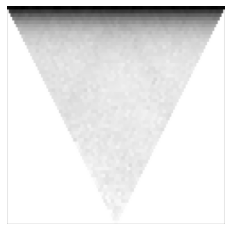

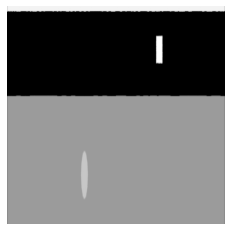

In [ ]:
#Check if validation data looks okay

ix = 300
plt.imshow(np.dstack((X_val[ix], X_val[ix], X_val[ix])))
plt.axis('off')
plt.show()

tmp = np.squeeze(y_val[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp, tmp, tmp)))
plt.axis('off')
plt.show()

In [ ]:
val_tar_ids[300]

'516two_obj_true.tiff'

In [ ]:
val_train_ids[300]

'516two_obj_app_res.tiff'

In [ ]:
(X_val[300] == 1).sum()

6739

In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 1.4 MB 4.0 MB/s 
     |████████████████████████████████| 462 kB 66.1 MB/s 
     |████████████████████████████████| 5.8 MB 18.5 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 6s (66.8 MB/s)
debconf: apt-extracttemplates failed: No such file or directory
E: Sub-process /usr/sbin/dpkg-preconfigure --apt || true received signal 2.
E: Failure running script /usr/sbin/dpkg-preconfigure --apt || true


In [ ]:
#Jaccard Distance Loss Metric

def jaccard_distance_loss(y_true, y_pred, smooth=100):
 
    intersection = K.sum(K.sum(K.abs(y_true * y_pred), axis=-1))
    sum_ = K.sum(K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1))
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

**Build Model**

In [ ]:
def build_model():
    # 256 -> 128
    c1 = Conv2D(16, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(input_layer)
    c1 = Conv2D(16, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(c1)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(0.4)(p1)

    # 128 -> 64
    c2 = Conv2D(32, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(p1)
    c2 = Conv2D(32, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(c2)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(0.4)(p2)

    #64 -> 32
    c3 = Conv2D(64, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(p2)
    c3 = Conv2D(64, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(c3)
    c3 = BatchNormalization()(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(0.4)(p3)

    # 32 -> 16
    c4 = Conv2D(128, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(p3)
    c4 = Conv2D(128, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(c4)
    c4 = BatchNormalization()(c4)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(0.4)(p4)

    # Middle
    convm = Conv2D(256, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(p4)
    convm = Conv2D(256, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(convm)
    convm = BatchNormalization()(convm)

    # 16 -> 32
    d4 = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding="same", kernel_initializer='he_normal')(convm)
    m4 = concatenate([c4, d4], axis=3)
    u4 = Conv2D(128, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(m4)
    u4 = Conv2D(128, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(u4)
    u4 = BatchNormalization()(u4)

    # 32 -> 64
    d3 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same", kernel_initializer='he_normal')(u4)
    m3 = concatenate([c3, d3], axis=3)
    u3 = Conv2D(64, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(m3)
    u3 = Conv2D(64, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(u3)
    u3 = BatchNormalization()(u3)

    # 64 -> 128
    d2 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding="same", kernel_initializer='he_normal')(u3)
    m2 = concatenate([c2, d2], axis=3)
    u2 = Conv2D(32, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(m2)
    u2 = Conv2D(32, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(u2)
    u2 = BatchNormalization()(u2)
 
    #128 -> 256
    d1 = Conv2DTranspose(16, (3, 3), strides=(2, 2), padding="same", kernel_initializer='he_normal')(u2)
    m1 = concatenate([c1, d1], axis=3)
    u1 = Conv2D(16, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(m1)
    u1 = Conv2D(16, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(u1)
    u1 = BatchNormalization()(u1)

    output_layer = Conv2D(1, (1,1), activation="relu")(u1)
    
    return output_layer

  
input_layer = Input((256, 256, 1))
output_layer = build_model()

In [ ]:
model = Model(input_layer, output_layer)
model.compile(loss=[weighted_bce], 
              optimizer=keras.optimizers.Adam(learning_rate=3e-5), metrics=[keras.metrics.RootMeanSquaredError(), jaccard_distance_loss])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 16  2320        ['conv2d[0][0]']                 
                                )                                                           

In [ ]:
#Train the model

early_stopping = EarlyStopping(patience=7, verbose=1)
model_checkpoint = ModelCheckpoint("UNetModelNEW.h5", save_best_only=True, verbose=1)

epochs = 100
batch_size = 32

history = model.fit(X, y, validation_data=[X_val, y_val], epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, model_checkpoint])

In [ ]:
model = load_model("/content/UNetModelNEW.h5", custom_objects={'jaccard_distance_loss':jaccard_distance_loss})

In [ ]:
#Predict on train and val
preds_train = model.predict(X, verbose=1)
preds_val = model.predict(X_val, verbose=1)

13/13 [==============================] - 1s 42ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

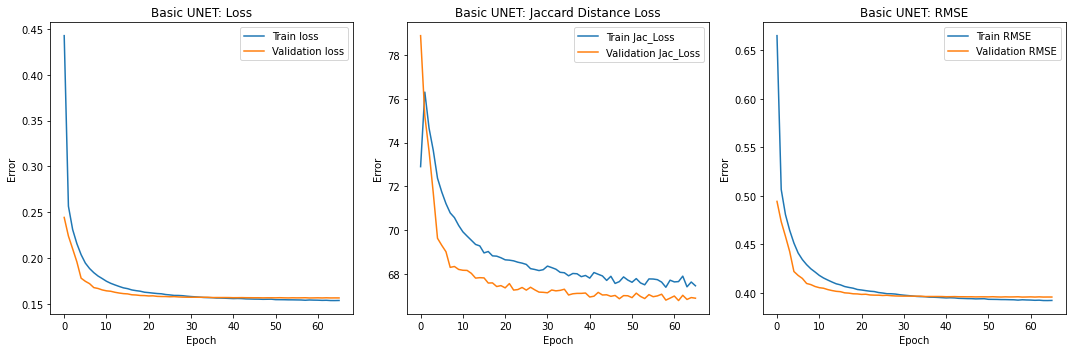

In [ ]:
fig, (ax_loss, ax_jac, ax_rmse) = plt.subplots(1, 3, figsize=(15,5))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax_loss.set_title('Basic UNET: Loss')
ax_loss.legend()
ax_loss.set_ylabel('Error')
ax_loss.set_xlabel('Epoch')
#ax_loss.xaxis.set_ticks(np.arange(0, 4, 1))

ax_jac.plot(history.epoch, history.history["jaccard_distance_loss"], label="Train Jac_Loss")
ax_jac.plot(history.epoch, history.history["val_jaccard_distance_loss"], label="Validation Jac_Loss")
ax_jac.set_title('Basic UNET: Jaccard Distance Loss')
ax_jac.legend()
ax_jac.set_ylabel('Error')
ax_jac.set_xlabel('Epoch')
#ax_iou.xaxis.set_ticks(np.arange(0, 4, 1))


ax_rmse.plot(history.epoch, history.history["root_mean_squared_error"], label="Train RMSE")
ax_rmse.plot(history.epoch, history.history["val_root_mean_squared_error"], label="Validation RMSE")
ax_rmse.set_title('Basic UNET: RMSE')
ax_rmse.legend()
ax_rmse.set_ylabel('Error')
ax_rmse.set_xlabel('Epoch')
#ax_rmse.xaxis.set_ticks(np.arange(0, 4, 1))

fig.tight_layout()

#from google.colab import files
#plt.savefig('BasicUNET3.png')
#files.download("BasicUNET3.png") 

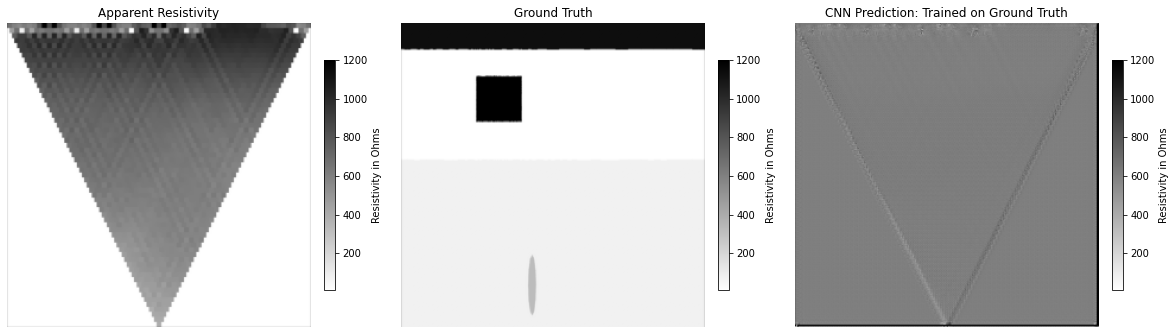

In [ ]:
# Perform a sanity check on some random training samples

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 10))

norm = plt.Normalize(vmin=10, vmax=1200, clip=True)

a = ax0.imshow(np.dstack((X[1000], X[1000], X[1000])), cmap='gray_r', norm=norm)
ax0.set_title('Apparent Resistivity')
ax0.axis('off')
ab = fig.colorbar(a, ax=ax0, fraction=0.035, pad=0.04)
ab.set_label('Resistivity in Ohms')

tmp = np.squeeze(y[1000]).astype(np.float32)
b = ax1.imshow(np.dstack((tmp,tmp,tmp)), cmap='gray_r', norm=norm)
ax1.set_title('Ground Truth')
ax1.axis('off')
bb = fig.colorbar(b, ax=ax1, fraction=0.035, pad=0.04)
bb.set_label('Resistivity in Ohms')

tmp = np.squeeze(preds_train[1000]).astype(np.float32)
c = ax2.imshow(np.dstack((tmp,tmp,tmp)), cmap='gray_r', norm=norm)
ax2.set_title('CNN Prediction: Trained on Ground Truth')
ax2.axis('off')
cb = fig.colorbar(c, ax=ax2, fraction=0.035, pad=0.04)
cb.set_label('Resistivity in Ohms')

#from google.colab import files
#plt.savefig("BasicUNetSwitchedVariables2.png")
#files.download("BasicUNetSwitchedVariables2.png") 

In [ ]:
preds_train[1000]

array([[[0.11188219],
        [0.37646237],
        [0.3079113 ],
        ...,
        [0.37377346],
        [0.35166514],
        [0.20628798]],

       [[0.2278893 ],
        [0.40097588],
        [0.33970866],
        ...,
        [0.35890576],
        [0.4039198 ],
        [0.3406551 ]],

       [[0.454232  ],
        [0.4728686 ],
        [0.3796433 ],
        ...,
        [0.32088572],
        [0.4362851 ],
        [0.44192767]],

       ...,

       [[0.93286556],
        [0.9500912 ],
        [1.103144  ],
        ...,
        [0.997193  ],
        [0.9568    ],
        [0.87365216]],

       [[0.89438164],
        [0.9598656 ],
        [1.0214199 ],
        ...,
        [0.9894952 ],
        [0.9557124 ],
        [0.9268427 ]],

       [[0.8172359 ],
        [0.8894981 ],
        [0.87578464],
        ...,
        [0.8651241 ],
        [0.93519765],
        [0.8757269 ]]], dtype=float32)

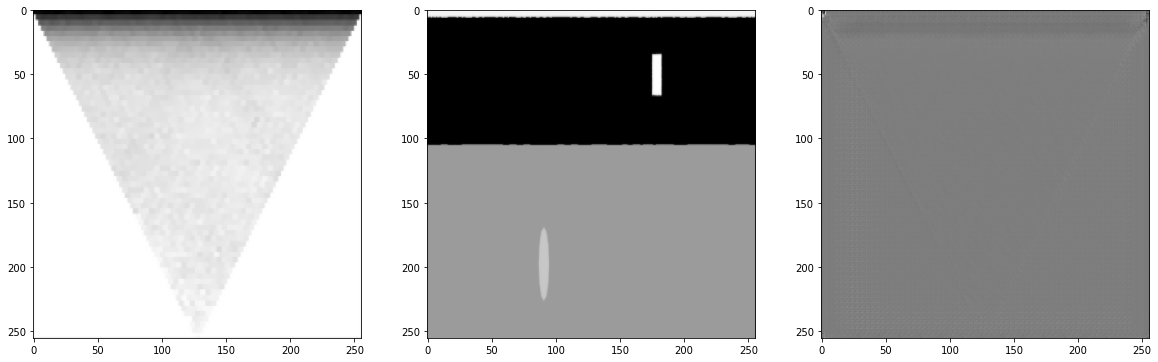

In [ ]:
# Perform a sanity check on some random validation samples

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 10))

ax0.imshow(np.dstack((X_val[300], X_val[300], X_val[300])))

tmp = np.squeeze(y_val[300]).astype(np.float32)
ax1.imshow(np.dstack((tmp,tmp,tmp)))

tmp = np.squeeze(preds_val[300]).astype(np.float32)
ax2.imshow(np.dstack((tmp,tmp,tmp)))
#ax2.contourf(preds_val[50].squeeze(), extend='both', cmap='gray')

In [ ]:
preds_val[300]

array([[[0.        ],
        [0.3485753 ],
        [0.18892318],
        ...,
        [0.32908192],
        [0.34437847],
        [0.20408502]],

       [[0.2151992 ],
        [0.3862756 ],
        [0.3419033 ],
        ...,
        [0.34185076],
        [0.35627687],
        [0.40927085]],

       [[0.4217478 ],
        [0.48152506],
        [0.4474152 ],
        ...,
        [0.3525763 ],
        [0.5040744 ],
        [0.5947504 ]],

       ...,

       [[0.93288034],
        [0.9501055 ],
        [1.1031631 ],
        ...,
        [0.99718744],
        [0.95686316],
        [0.8737888 ]],

       [[0.89439166],
        [0.95987594],
        [1.0214413 ],
        ...,
        [0.98946005],
        [0.9557492 ],
        [0.926911  ]],

       [[0.817247  ],
        [0.8895044 ],
        [0.87580276],
        ...,
        [0.86518735],
        [0.9352521 ],
        [0.8758275 ]]], dtype=float32)

In [ ]:
def weighted_bce(y_true, y_pred):
  weights = (y_true * 59.) + 1.
  bce = K.binary_crossentropy(y_true, y_pred)
  weighted_bce = K.mean(bce * weights)
  return weighted_bce